In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longtitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
        print(coordinate[0], coordinate[1])

57.647725398087005 -178.54013425626107
42.85199896782561 162.71220533012809
-80.04960716068777 -135.2158713479653
9.631873141799389 99.33537573707144
-83.22947544965747 21.523839961208893
60.28050661650536 136.96870081916603
53.4819622918173 -29.279430371862844
-74.22350706734116 -140.79400566547628
24.585136060791243 2.673829293119894
53.142849708984244 5.095364294825998
-66.61432000949351 -111.74053684680104
67.88500797268773 1.444721168979214
-83.9095541387661 115.44295671688309
-55.65505924089721 84.234250586457
-30.574316814233107 162.39559529243058
79.59232887478694 109.2398837761047
-46.37583370068329 -51.13106203205717
85.25971786092262 126.8622057743612
19.792043545692238 37.36755058093044
4.72953148007052 -78.86618268772946
-53.63052786056446 -90.14087050828074
2.797272718913746 125.75590714595904
-89.28043669083435 -56.570686401257134
-4.023489263567839 -8.462448378869993
86.78087837432477 28.969943734972105
66.18788569872527 -130.16062346778799
-26.564258720161497 -179.4718

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
#use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
        citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

provideniya ru
severo-kurilsk ru
rikitea pf
chaiya th
bredasdorp za
solnechnyy ru
grindavik is
rikitea pf
adrar dz
harlingen nl
punta arenas cl
raudeberg no
albany au
busselton au
byron bay au
saskylakh ru
mar del plata ar
tiksi ru
sawakin sd
bajo baudo co
punta arenas cl
bitung id
ushuaia ar
georgetown sh
mehamn no
norman wells ca
vaini to
kapaa us
talnakh ru
saint-philippe re
puerto ayora ec
hermanus za
bengkulu id
avarua ck
balabac ph
aklavik ca
chokurdakh ru
lata sb
arraial do cabo br
bluff nz
cape town za
colquechaca bo
victoria sc
saskylakh ru
dikson ru
busselton au
haines junction ca
ambikapur in
elliot lake ca
kamen-rybolov ru
atuona pf
mahebourg mu
bluff nz
saint-joseph re
cape town za
suraabad az
new norfolk au
leningradskiy ru
atuona pf
kutum sd
clyde river ca
bredasdorp za
saskylakh ru
saint george us
ushuaia ar
belyy yar ru
busselton au
klaksvik fo
cristian ro
upernavik gl
bambous virieux mu
kaitangata nz
kapaa us
gizo sb
coahuayana mx
avarua ck
punta arenas cl
chuy uy
ush

arraial do cabo br
pangkalanbuun id
port alfred za
alice springs au
ushuaia ar
hervey bay au
azare ng
iquitos pe
ziro in
carnarvon au
arraial do cabo br
tasiilaq gl
saskylakh ru
attawapiskat ca
sinnamary gf
meulaboh id
illoqqortoormiut gl
ahipara nz
clyde river ca
jamestown sh
tanggu cn
butaritari ki
anadyr ru
terra santa br
bredasdorp za
alofi nu
port elizabeth za
kodiak us
irsha ru
saleaula ws
hede cn
chara ru
shahrud ir
bethel us
pevek ru
shimoda jp
arona es
bredasdorp za
new norfolk au
sentyabrskiy ru
vila velha br
tual id
bathsheba bb
port hardy ca
mahajanga mg
fortuna us
upernavik gl
mahebourg mu
tommot ru
hobart au
vao nc
arraial do cabo br
tiksi ru
lorengau pg
bluff nz
praia cv
aripuana br
harper lr
bluff nz
kurumkan ru
airai pw
sibolga id
torbay ca
susanville us
egvekinot ru
ondo ng
rio grande br
college us
hermanus za
awbari ly
tuatapere nz
lasa cn
souillac mu
busselton au
maragogi br
hami cn
port alfred za
rikitea pf
barrow us
mys shmidta ru
busselton au
boueni yt
atuona pf


carnarvon au
butaritari ki
port alfred za
bati et
mar del plata ar
bethel us
saleaula ws
tubuala pa
thompson ca
concordia ar
belushya guba ru
mataura pf
honiara sb
rikitea pf
ribeira grande pt
sungaipenuh id
san quintin mx
ushuaia ar
ribeira grande pt
yellowknife ca
jamestown sh
hermanus za
rikitea pf
port elizabeth za
bluff nz
ushuaia ar
saint-philippe re
nerchinskiy zavod ru
ixtapa mx
tiksi ru
arraial do cabo br
dargaville nz
chernenko ru
santander es
bogorodskoye ru
geraldton au
bredasdorp za
lazaro cardenas mx
eyl so
vaini to
juegang cn
hobart au
atuona pf
albany au
andros town bs
kahului us
clyde river ca


In [7]:
#Create a list for holdings the cities
cities = []

#identify the nearest city for each latitude and longitute combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)
    

610

In [18]:
# Import the requests library.
import requests

# Import the API key.
#from config import weather_api_key

In [36]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


In [22]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [26]:
#Create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

#create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
#for i in range(len(cities)):

for i, city in enumerate(cities):
    
    #Group cities in sets of 50 since we can only call 60 times per minute for the free version
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
    
    #except Exception as e:
        #print(e)     
        pass
    
#Indicate data loading is complete
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | chaiya
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | solnechnyy
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | adrar
Processing Record 9 of Set 1 | harlingen
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | byron bay
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | sawakin
Processing Record 19 of Set 1 | bajo baudo
City not found. Skipping ...
Processing Record 20 of Set 1 | bitung
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | georgeto

Processing Record 37 of Set 4 | hasaki
Processing Record 38 of Set 4 | hovd
Processing Record 39 of Set 4 | zhuhai
Processing Record 40 of Set 4 | lagunas
Processing Record 41 of Set 4 | tateyama
Processing Record 42 of Set 4 | wajir
Processing Record 43 of Set 4 | zonguldak
Processing Record 44 of Set 4 | coquimbo
Processing Record 45 of Set 4 | oriximina
Processing Record 46 of Set 4 | faya
Processing Record 47 of Set 4 | scarborough
Processing Record 48 of Set 4 | dalhousie
Processing Record 49 of Set 4 | maine-soroa
Processing Record 50 of Set 4 | soe
Processing Record 1 of Set 5 | kamen-na-obi
Processing Record 2 of Set 5 | puerto rondon
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | constitucion
Processing Record 5 of Set 5 | the valley
Processing Record 6 of Set 5 | avera
Processing Record 7 of Set 5 | bama
Processing Record 8 of Set 5 | maykain
City not found. Skipping ...
Processing Record 9 of Set 5 | khatanga
Processing Record 10 of Set 5 | itigi
Process

Processing Record 27 of Set 8 | irsha
Processing Record 28 of Set 8 | hede
Processing Record 29 of Set 8 | chara
Processing Record 30 of Set 8 | shahrud
Processing Record 31 of Set 8 | pevek
Processing Record 32 of Set 8 | shimoda
Processing Record 33 of Set 8 | arona
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping ...
Processing Record 35 of Set 8 | vila velha
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | port hardy
Processing Record 38 of Set 8 | mahajanga
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | tommot
Processing Record 41 of Set 8 | vao
Processing Record 42 of Set 8 | praia
Processing Record 43 of Set 8 | aripuana
Processing Record 44 of Set 8 | harper
Processing Record 45 of Set 8 | kurumkan
Processing Record 46 of Set 8 | sibolga
Processing Record 47 of Set 8 | susanville
Processing Record 48 of Set 8 | egvekinot
Processing Record 49 of Set 8 | ondo
Processing Record 50 of Set 8 | rio grande
Processing Re

Processing Record 19 of Set 12 | at-bashi
Processing Record 20 of Set 12 | katherine
Processing Record 21 of Set 12 | san rafael
Processing Record 22 of Set 12 | ketchikan
Processing Record 23 of Set 12 | cosala
Processing Record 24 of Set 12 | pirajui
Processing Record 25 of Set 12 | kichmengskiy gorodok
Processing Record 26 of Set 12 | bartica
Processing Record 27 of Set 12 | dzhusaly
City not found. Skipping ...
Processing Record 28 of Set 12 | ostrovnoy
Processing Record 29 of Set 12 | batagay
Processing Record 30 of Set 12 | gat
Processing Record 31 of Set 12 | luwuk
Processing Record 32 of Set 12 | tura
Processing Record 33 of Set 12 | solovetskiy
City not found. Skipping ...
Processing Record 34 of Set 12 | taywarah
Processing Record 35 of Set 12 | skorodnoye
Processing Record 36 of Set 12 | along
Processing Record 37 of Set 12 | yenagoa
Processing Record 38 of Set 12 | jinchang
Processing Record 39 of Set 12 | kushima
Processing Record 40 of Set 12 | oistins
Processing Record 4

In [28]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-5.91,63,100,4.92,RU,2022-12-08 02:14:04
1,Severo-Kurilsk,50.6789,156.1250,-1.98,65,78,9.06,RU,2022-12-08 02:12:07
2,Rikitea,-23.1203,-134.9692,24.26,80,6,8.51,PF,2022-12-08 02:14:06
3,Chaiya,9.3862,99.1986,24.39,92,100,2.14,TH,2022-12-08 02:14:07
4,Bredasdorp,-34.5322,20.0403,15.67,92,92,1.82,ZA,2022-12-08 02:14:08
5,Solnechnyy,50.7214,136.6319,-12.47,57,8,1.42,RU,2022-12-08 02:14:09
6,Grindavik,63.8424,-22.4338,-1.74,74,40,3.09,IS,2022-12-08 02:14:10
7,Adrar,20.5022,-10.0711,25.25,35,49,1.78,MR,2022-12-08 02:09:48
8,Harlingen,26.1906,-97.6961,24.05,97,75,7.20,US,2022-12-08 02:13:13
9,Punta Arenas,-53.1500,-70.9167,6.06,65,0,6.17,CL,2022-12-08 02:10:30


In [29]:
len(city_data_df)

569

In [32]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-12-08 02:14:04,64.3833,-173.3000,-5.91,63,100,4.92
1,Severo-Kurilsk,RU,2022-12-08 02:12:07,50.6789,156.1250,-1.98,65,78,9.06
2,Rikitea,PF,2022-12-08 02:14:06,-23.1203,-134.9692,24.26,80,6,8.51
3,Chaiya,TH,2022-12-08 02:14:07,9.3862,99.1986,24.39,92,100,2.14
4,Bredasdorp,ZA,2022-12-08 02:14:08,-34.5322,20.0403,15.67,92,92,1.82
5,Solnechnyy,RU,2022-12-08 02:14:09,50.7214,136.6319,-12.47,57,8,1.42
6,Grindavik,IS,2022-12-08 02:14:10,63.8424,-22.4338,-1.74,74,40,3.09
7,Adrar,MR,2022-12-08 02:09:48,20.5022,-10.0711,25.25,35,49,1.78
8,Harlingen,US,2022-12-08 02:13:13,26.1906,-97.6961,24.05,97,75,7.20
9,Punta Arenas,CL,2022-12-08 02:10:30,-53.1500,-70.9167,6.06,65,0,6.17


In [49]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
##Switching to scatterplots
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [51]:
#Import the time module
import time
#get today's date in seconds
today = time.time()
today

1670469785.0424078

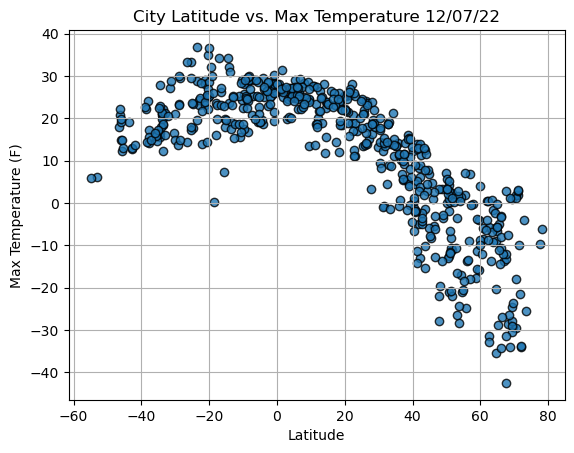

In [52]:
#Import time module
import time

#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Fig1.png")

#show plot
plt.show()